# Loan Application Status Prediction
### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.                

Independent Variables:           
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested. 

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis (EDA)

In [3]:
# checking data shape
df.shape

(614, 13)

Our dataset has 614 rows and 13 columns

In [4]:
# checking data type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Columns data types are object, int64 and float64.

In [5]:
# checking duplicate data
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset.')
else:
    print('No duplicate rows present in the dataset.')    

Duplicate rows = 0
No duplicate rows present in the dataset.


In [6]:
# value count and missing values
for i in df.columns:
    print('\nTotal unique values in',i,'column -',df[i].nunique(),'\n')
    print(df[i].value_counts())
    print('\nMissing values present in',i,'column -',df[i].isnull().sum())
    print('missing values percentage',((df[i].isnull().sum()/df.shape[0])*100).round(2),'%')
    print('_'*50)


Total unique values in Loan_ID column - 614 

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Missing values present in Loan_ID column - 0
missing values percentage 0.0 %
__________________________________________________

Total unique values in Gender column - 2 

Male      489
Female    112
Name: Gender, dtype: int64

Missing values present in Gender column - 13
missing values percentage 2.12 %
__________________________________________________

Total unique values in Married column - 2 

Yes    398
No     213
Name: Married, dtype: int64

Missing values present in Married column - 3
missing values percentage 0.49 %
__________________________________________________

Total unique values in Dependents column - 4 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Missing values present in Dependents column - 15
missin

1) Loan_ID column is the identifier. we will remove it later.                                                               
2) Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History have null values.                
3) Loan_Status is the target variable. It contains two unique values Y and N. y is 68.7% of data and N is 31.3% of data.         
4) Credit_History contains categorical type of data. It has two values 0.0 and 0.1.

In [7]:
# dropping Loan_ID column 
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Loan_ID column is removed. Now we have 614 rows and 12 columns. Some columns have null values.

In [9]:
# statistical description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.describe(include=object)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


### Data Visualization

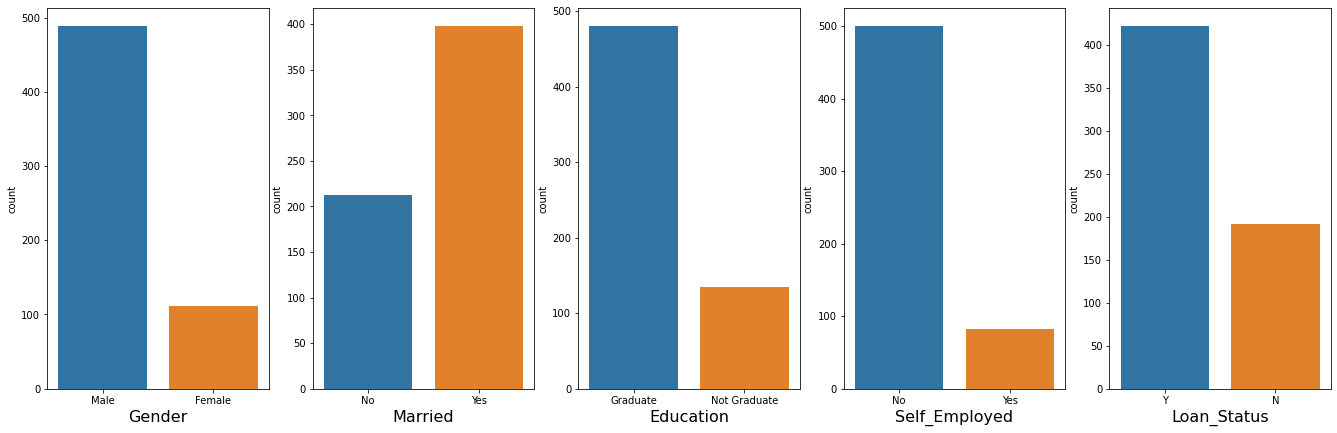

In [11]:
# count plot
plt.figure(figsize=(23,7))
pn=1
for i in ['Gender','Married','Education','Self_Employed','Loan_Status']:
    if pn<=6:
        ax=plt.subplot(1,5,pn)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=16)
    pn+=1
plt.show()

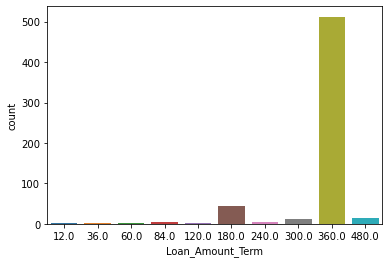

In [12]:
# scatter plot
sns.countplot(x='Loan_Amount_Term',data=df)
plt.show()

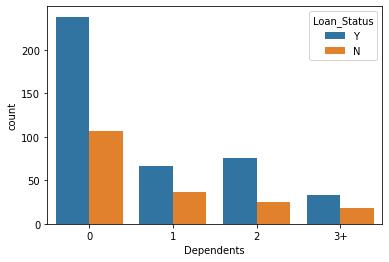

In [13]:
# count plot
sns.countplot(x='Dependents',hue='Loan_Status',data=df)
plt.show()

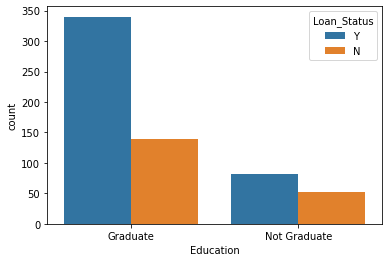

In [14]:
# count plot
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

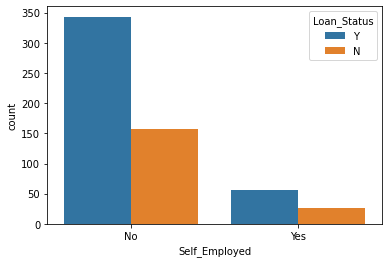

In [15]:
# count plot
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.show()

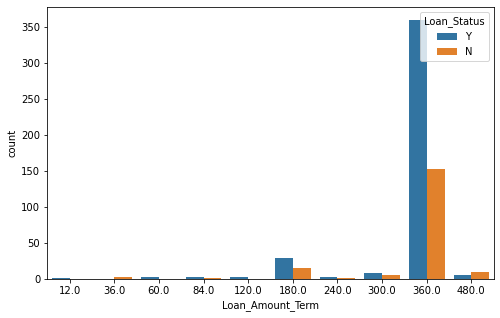

In [16]:
# count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)
plt.show()

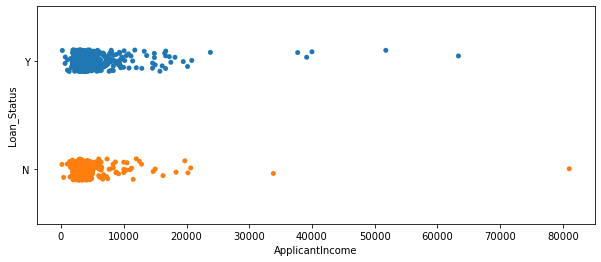

In [17]:
# strip plot Loan_Status vs ApplicantIncome
plt.figure(figsize=(10,4))
sns.stripplot(x='ApplicantIncome', y='Loan_Status', data=df)
plt.show()

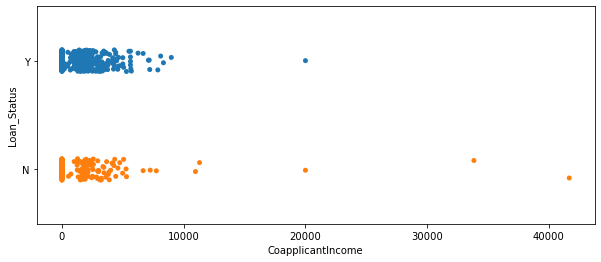

In [18]:
# strip plot CoapplicantIncome vs Loan_Status
plt.figure(figsize=(10,4))
sns.stripplot(x='CoapplicantIncome', y='Loan_Status', data=df)
plt.show()

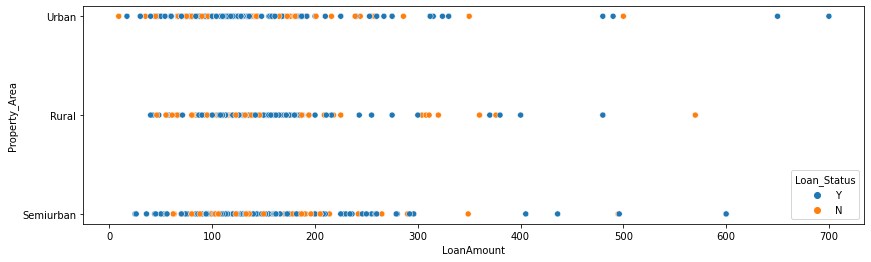

In [19]:
# scatter plot
plt.figure(figsize=(14,4))
sns.scatterplot(x='LoanAmount', y='Property_Area',hue='Loan_Status', data=df)
plt.show()

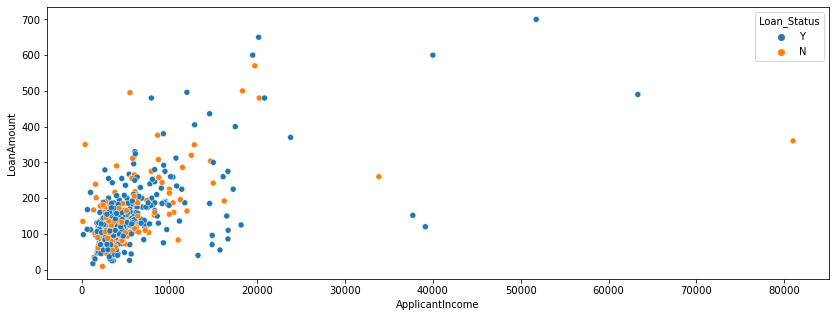

In [20]:
# scatter plot
plt.figure(figsize=(14,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount',hue='Loan_Status', data=df)
plt.show()

Most of the applicants income is less 20,000.

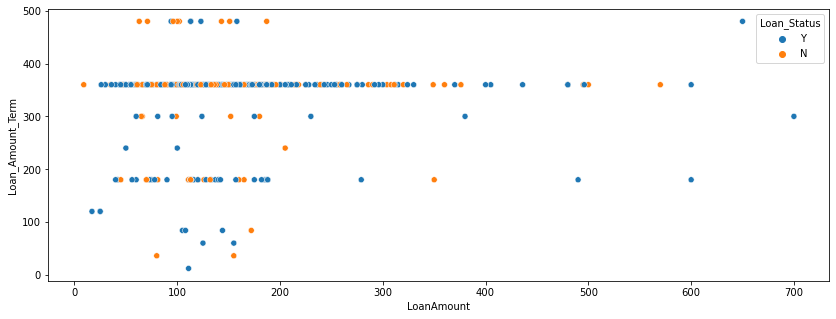

In [21]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term',hue='Loan_Status', data=df)
plt.show()

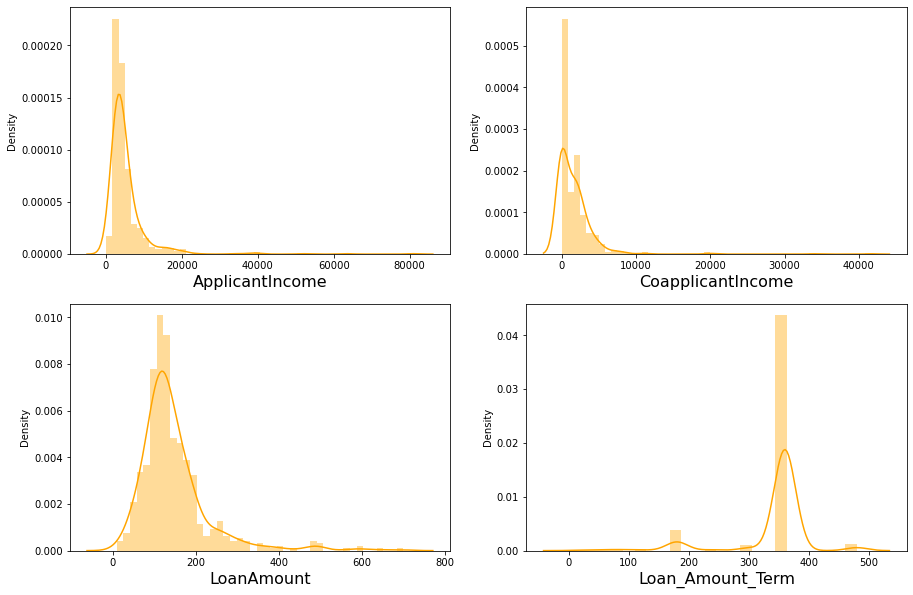

In [22]:
# distribution plot
plt.figure(figsize=(15,10))
pn=1
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    if pn <=4:
        ax = plt.subplot(2,2,pn)
        sns.distplot(df[i],color='orange')
        plt.xlabel(i,fontsize=16)
    pn+=1
plt.show()

 ApplicantIncome, CoapplicantIncome and LoanAmount are right skewed distribution. Loan_Amount_Term is left skewed distribution

In [23]:
# correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


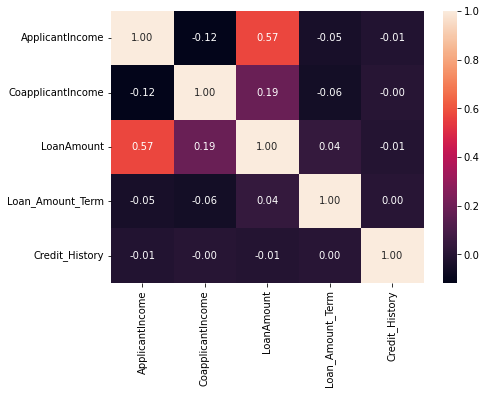

In [24]:
# heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

Loan_Amount and ApplicantIncome have positive relationship.

In [25]:
# dealing with null values
# using mode
df['Gender'].replace(np.nan,df['Gender'].mode()[0],inplace=True)
df['Married'].replace(np.nan,df['Married'].mode()[0],inplace=True)
df['Self_Employed'].replace(np.nan,df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].replace(np.nan,df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].replace(np.nan,df['Credit_History'].mode()[0],inplace=True)

# using mean
df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean(),inplace=True)
df=df.round({'LoanAmount':1})
# checking null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now no null values present.

In [26]:
# checking skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726617
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term are skewed features. Since Credit_History column contains categorical data, we will not work on its skewness.

In [27]:
# skewed columns
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [28]:
# reducing skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[col]= pt.fit_transform(df[col])
df.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024374
Loan_Amount_Term     0.392571
Credit_History      -2.021971
dtype: float64

skewness is reduced. Now let's encode categorical variables.

In [29]:
# encoding categorical columns
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
for i in ['Gender','Married','Self_Employed','Dependents','Education','Property_Area']:
    df[i] = OHE.fit_transform(df[i].values.reshape(-1,1))
    print(OHE.categories_)

[array(['Female', 'Male'], dtype=object)]
[array(['No', 'Yes'], dtype=object)]
[array(['No', 'Yes'], dtype=object)]
[array(['0', '1', '2', '3+'], dtype=object)]
[array(['Graduate', 'Not Graduate'], dtype=object)]
[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]


In [30]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,1.0,1.0,1.0,0.544331,-1.102837,0.235225,0.175540,1.0,0.0,Y
1,0.0,0.0,0.0,1.0,1.0,0.170974,0.750578,-0.037651,0.175540,1.0,1.0,N
2,0.0,0.0,1.0,1.0,0.0,-0.499955,-1.102837,-1.346302,0.175540,1.0,0.0,Y
3,0.0,0.0,1.0,0.0,1.0,-0.743873,0.891686,-0.167879,0.175540,1.0,0.0,Y
4,0.0,1.0,1.0,1.0,1.0,0.582817,-1.102837,0.158618,0.175540,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,1.0,1.0,1.0,-0.554885,-1.102837,-1.205096,0.175540,1.0,1.0,Y
610,0.0,0.0,0.0,1.0,1.0,-0.000290,-1.102837,-2.293321,-2.312879,1.0,1.0,Y
611,0.0,0.0,0.0,1.0,1.0,1.023487,0.208603,1.372416,0.175540,1.0,0.0,Y
612,0.0,0.0,0.0,1.0,1.0,0.931750,-1.102837,0.738931,0.175540,1.0,0.0,Y


In [31]:
# separating target variable and features
x = df.drop(columns='Loan_Status')            # features
y= df['Loan_Status']                          # target variable

In [32]:
# replacing values
y = y.replace(['Y','N'],[1,0])
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [33]:
# value count
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [34]:
# balancing data
from imblearn.over_sampling import SMOTE
SM = SMOTE(sampling_strategy=0.75)
x,y = SM.fit_resample(x,y)
print(x.shape)
print(y.shape)

(738, 11)
(738,)


In [35]:
y.value_counts()

1    422
0    316
Name: Loan_Status, dtype: int64

#### Model

In [36]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
# creating lists of models
LR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

In [38]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=39)

In [39]:
# LogisticRegression model 
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LR,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7882882882882883 

confusion matrix:-
 [[ 52  40]
 [  7 123]] 

classification report:-
               precision    recall  f1-score   support

           0       0.88      0.57      0.69        92
           1       0.75      0.95      0.84       130

    accuracy                           0.79       222
   macro avg       0.82      0.76      0.76       222
weighted avg       0.81      0.79      0.78       222

checking Cross validation score:-

cross validation scores:- [0.77027027 0.72972973 0.7027027  0.78378378 0.74324324 0.7972973
 0.77027027 0.77027027 0.76712329 0.80821918] 
cross validation mean score = 0.7642910033320991 
Difference between accuracy score and cross validation mean score = 2.3997284956189247


In [40]:
# RandomForestClassifier model
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8153153153153153 

confusion matrix:-
 [[ 64  28]
 [ 13 117]] 

classification report:-
               precision    recall  f1-score   support

           0       0.83      0.70      0.76        92
           1       0.81      0.90      0.85       130

    accuracy                           0.82       222
   macro avg       0.82      0.80      0.80       222
weighted avg       0.82      0.82      0.81       222

checking Cross validation score:-

cross validation scores:- [0.81081081 0.74324324 0.7027027  0.7972973  0.81081081 0.75675676
 0.87837838 0.85135135 0.87671233 0.93150685] 
cross validation mean score = 0.8159570529433543 
Difference between accuracy score and cross validation mean score = -0.06417376280389853


In [41]:
# GradientBoostingClassifier model
GBC.fit(x_train,y_train)
y_pred=GBC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(GBC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8108108108108109 

confusion matrix:-
 [[ 60  32]
 [ 10 120]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.65      0.74        92
           1       0.79      0.92      0.85       130

    accuracy                           0.81       222
   macro avg       0.82      0.79      0.80       222
weighted avg       0.82      0.81      0.81       222

checking Cross validation score:-

cross validation scores:- [0.74324324 0.72972973 0.67567568 0.77027027 0.77027027 0.77027027
 0.83783784 0.87837838 0.82191781 0.93150685] 
cross validation mean score = 0.7929100333209922 
Difference between accuracy score and cross validation mean score = 1.7900777489818664


In [42]:
# KNeighborsClassifier model
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(KNN,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7342342342342343 

confusion matrix:-
 [[ 53  39]
 [ 20 110]] 

classification report:-
               precision    recall  f1-score   support

           0       0.73      0.58      0.64        92
           1       0.74      0.85      0.79       130

    accuracy                           0.73       222
   macro avg       0.73      0.71      0.72       222
weighted avg       0.73      0.73      0.73       222

checking Cross validation score:-

cross validation scores:- [0.78378378 0.66216216 0.67567568 0.67567568 0.78378378 0.66216216
 0.71621622 0.71621622 0.80821918 0.7260274 ] 
cross validation mean score = 0.7209922251018142 
Difference between accuracy score and cross validation mean score = 1.324200913242013


In [43]:
# AdaBoostClassifier model
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ABC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7927927927927928 

confusion matrix:-
 [[ 61  31]
 [ 15 115]] 

classification report:-
               precision    recall  f1-score   support

           0       0.80      0.66      0.73        92
           1       0.79      0.88      0.83       130

    accuracy                           0.79       222
   macro avg       0.80      0.77      0.78       222
weighted avg       0.79      0.79      0.79       222

checking Cross validation score:-

cross validation scores:- [0.77027027 0.71621622 0.63513514 0.75675676 0.77027027 0.82432432
 0.7972973  0.78378378 0.71232877 0.80821918] 
cross validation mean score = 0.7574601999259534 
Difference between accuracy score and cross validation mean score = 3.533259286683943


In [44]:
# ExtraTreesclassifier model
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8198198198198198 

confusion matrix:-
 [[ 65  27]
 [ 13 117]] 

classification report:-
               precision    recall  f1-score   support

           0       0.83      0.71      0.76        92
           1       0.81      0.90      0.85       130

    accuracy                           0.82       222
   macro avg       0.82      0.80      0.81       222
weighted avg       0.82      0.82      0.82       222

checking Cross validation score:-

cross validation scores:- [0.77027027 0.72972973 0.68918919 0.78378378 0.81081081 0.72972973
 0.86486486 0.85135135 0.90410959 0.90410959] 
cross validation mean score = 0.8037948907811922 
Difference between accuracy score and cross validation mean score = 1.6024929038627622


In [45]:
# DecisionTreeClassifier model
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(DTC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7342342342342343 

confusion matrix:-
 [[70 22]
 [37 93]] 

classification report:-
               precision    recall  f1-score   support

           0       0.65      0.76      0.70        92
           1       0.81      0.72      0.76       130

    accuracy                           0.73       222
   macro avg       0.73      0.74      0.73       222
weighted avg       0.74      0.73      0.74       222

checking Cross validation score:-

cross validation scores:- [0.67567568 0.72972973 0.58108108 0.77027027 0.75675676 0.74324324
 0.87837838 0.74324324 0.73972603 0.73972603] 
cross validation mean score = 0.7357830433172899 
Difference between accuracy score and cross validation mean score = -0.15488090830556578


In [46]:
# Support vector Machines model
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(svc,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7927927927927928 

confusion matrix:-
 [[ 51  41]
 [  5 125]] 

classification report:-
               precision    recall  f1-score   support

           0       0.91      0.55      0.69        92
           1       0.75      0.96      0.84       130

    accuracy                           0.79       222
   macro avg       0.83      0.76      0.77       222
weighted avg       0.82      0.79      0.78       222

checking Cross validation score:-

cross validation scores:- [0.78378378 0.7027027  0.71621622 0.75675676 0.77027027 0.77027027
 0.78378378 0.75675676 0.73972603 0.78082192] 
cross validation mean score = 0.756108848574602 
Difference between accuracy score and cross validation mean score = 3.6683944218190767


Our best is KNeighborsClassifier. It has least difference between accuracy score and cross validation mean score.

### Hyperparameter tuning

In [47]:
# parameters for KNN models
param = {'n_neighbors':[3,5,7],
         'algorithm':['auto','ball_tree','kd_tree','brute'],
         'leaf_size':[33,35,40],
         'n_jobs':[-2,-1,1]
          }

GSCV= GridSearchCV(estimator=KNN,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [33, 35, 40], 'n_jobs': [-2, -1, 1],
                         'n_neighbors': [3, 5, 7]})

In [48]:
# finding best parameter value
GSCV.best_params_

{'algorithm': 'auto', 'leaf_size': 33, 'n_jobs': -2, 'n_neighbors': 3}

In [49]:
# using best parameter value
Model = KNeighborsClassifier(n_neighbors=3,algorithm='auto',leaf_size=33,n_jobs=-2)

In [50]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.7612612612612613 

confusion matrix:-
 [[ 59  33]
 [ 20 110]] 

classification report:-
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        92
           1       0.77      0.85      0.81       130

    accuracy                           0.76       222
   macro avg       0.76      0.74      0.75       222
weighted avg       0.76      0.76      0.76       222



Accuracy score is 76.12%. Before tuning the model it was 73.42%.

In [51]:
# ROC curve
fpr,tpr,threshold =roc_curve(y_test,y_pred)
print('Threshold=',threshold,'\nFalse positive rate=',fpr,'\nTrue positive rate=',tpr)

Threshold= [2 1 0] 
False positive rate= [0.         0.35869565 1.        ] 
True positive rate= [0.         0.84615385 1.        ]


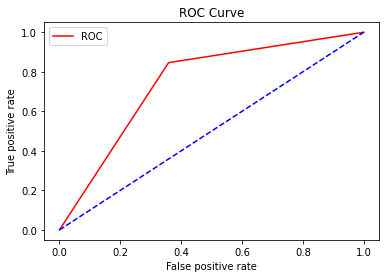

In [52]:
# plotting roc curve
plt.plot(fpr,tpr,color='red', label ='ROC')
plt.plot([0,1],[0,1], color = 'blue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [53]:
# AUC score
auc_score =roc_auc_score(y_test,y_pred)
print(auc_score)

0.7437290969899666


In [54]:
# saving model
import pickle
pickle.dump(Model,open('Loan status prediction','wb'))